In [1284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly. express as px
from plotly. offline import init_notebook_mode, iplot, plot 
from plotly. subplots import make_subplots 
from collections import Counter 
from math import sqrt 
from random import randrange 
import os
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn. linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

In [1286]:
pwd

'C:\\Users\\Lenovo'

In [1288]:
train=pd.read_csv("train.csv.csv")
test=pd.read_csv("test.csv.csv")

In [1290]:
#printing the train and test size
print("train shape: ",train.shape)
print("Test shape:",test.shape)

train shape:  (576, 6)
Test shape: (576, 6)


In [1292]:
#printing 1st 5 rows
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [1294]:
#counting the number of people donated and not donated
train["Made Donation in March 2007"].value_counts()

Made Donation in March 2007
0    438
1    138
Name: count, dtype: int64

In [1296]:
#storing dependent variable in y
y=train.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [1298]:
#printing last fiv rows
train.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [1300]:
#romoving unnamed: 0  columns
old_train=train
train=train.iloc[:,1:5]
test=test.iloc[:,1:5]

In [1302]:
#printing 1st 5 rows
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [1304]:
#merge both train and test data
df=pd.merge(train,test)

In [1306]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [1308]:
#setting the independent and dependent variable
X=df.iloc[:,:]
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


### DATA EXPLORATION

In [1311]:
#stastics of data
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


<Axes: ylabel='Months since Last Donation'>

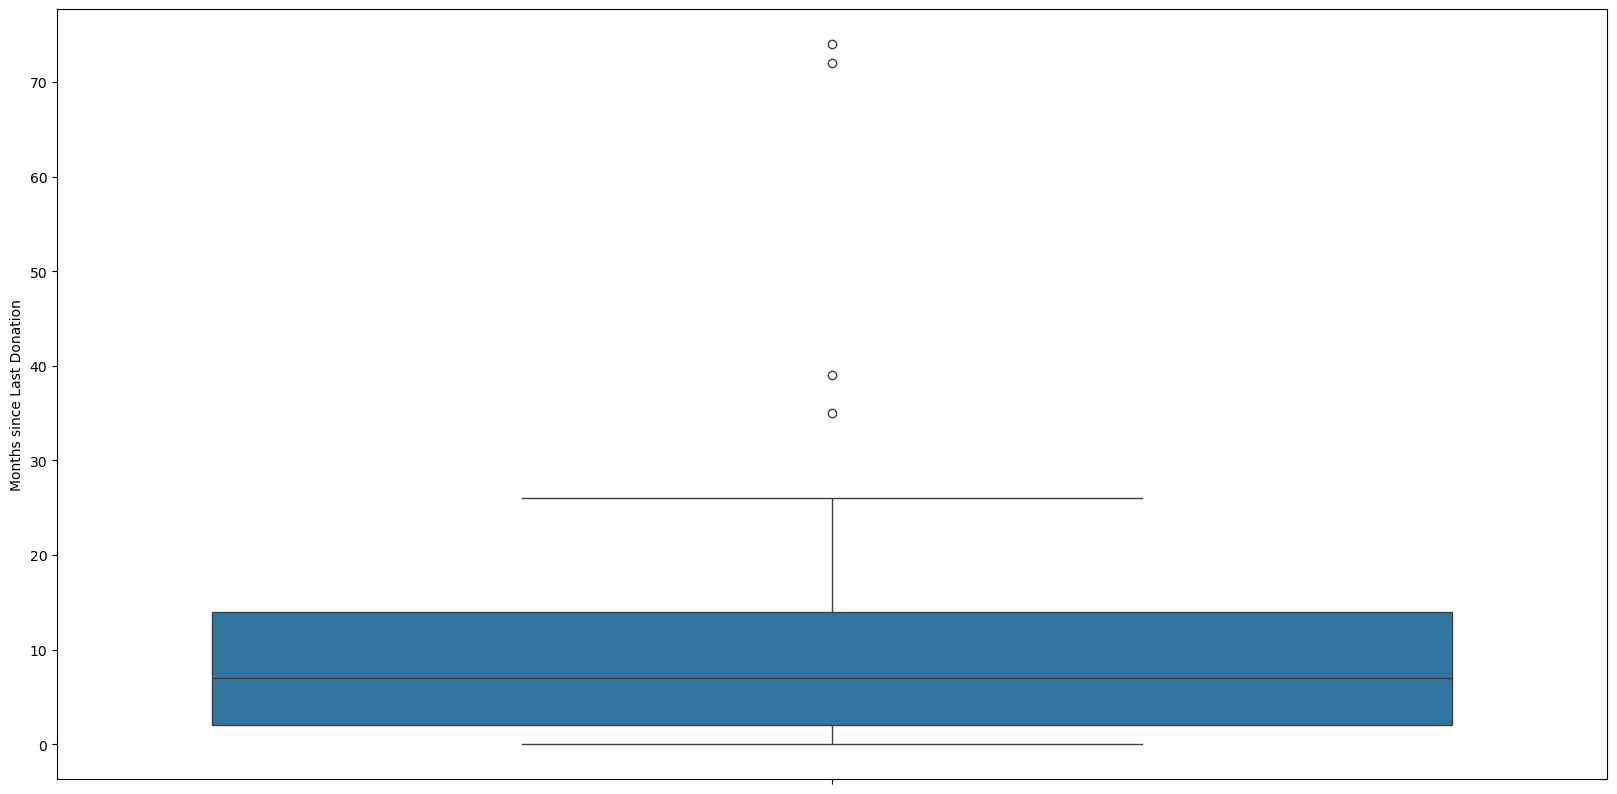

In [1313]:
#boxplot for months since last donation
plt.figure(figsize=(20,10))
sns.boxplot(y="Months since Last Donation",data=old_train)

<Axes: >

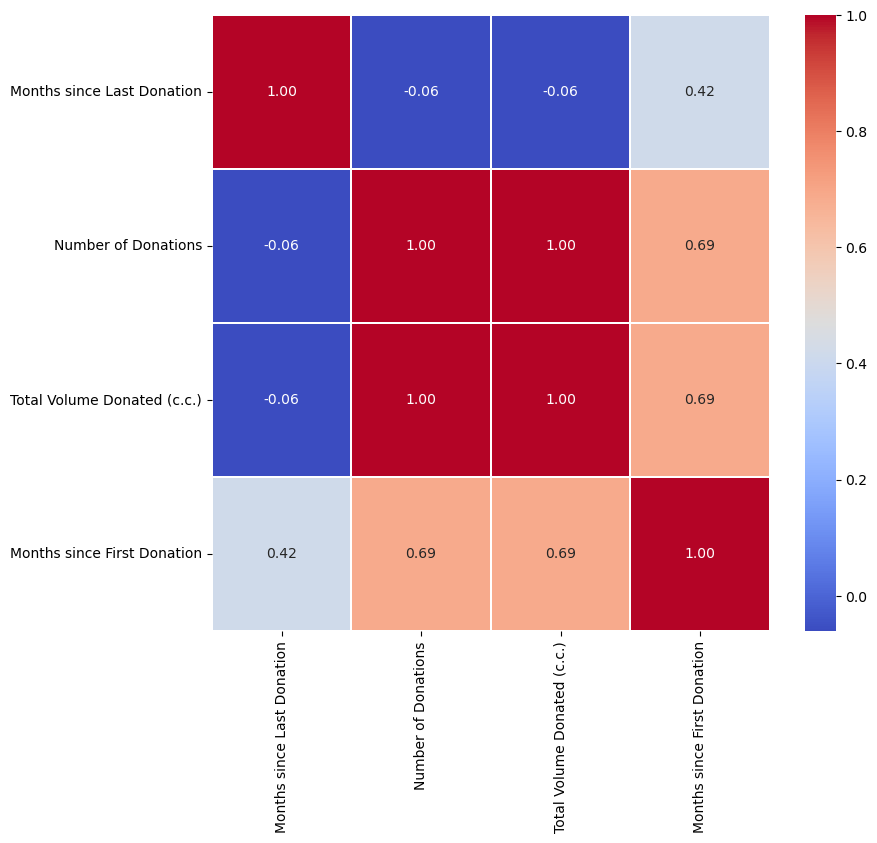

In [1314]:
#corelation between all variables
corrmat=X.corr()
f,ax= plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax = ax, cmap = 'coolwarm',linewidths = 0.1,fmt = ".2f",annot=True)


In [1316]:
#printing all unoque values for months since last donation
train["Months since Last Donation"].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)

### FEATURE ENGINEERING

In [1318]:
##creating new variable for calculating how many times a person have donated
X["Donating for"] =(X["Months since First Donation"]- X["Months since Last Donation"])

In [1322]:
X.head() ## seeing 1st five rows of dataframe

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,50,12500,98,96
1,0,13,3250,28,28
2,1,16,4000,35,34
3,2,20,5000,45,43
4,1,24,6000,77,76


<Axes: >

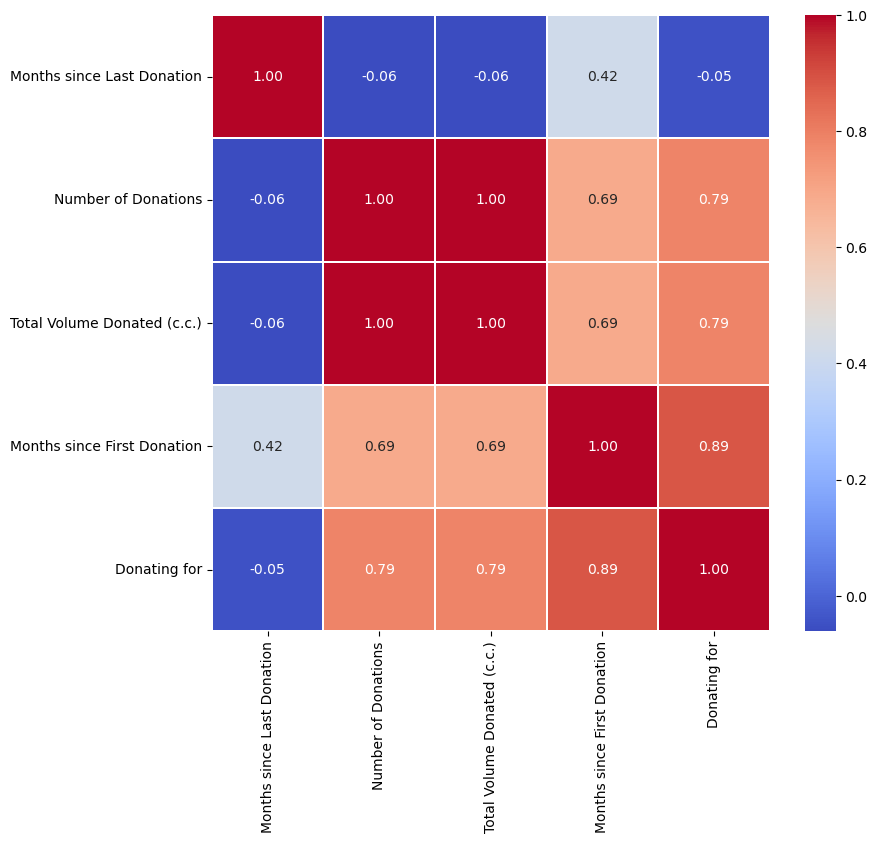

In [1324]:
corrmat=X.corr()
f,ax= plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax = ax, cmap = 'coolwarm',linewidths = 0.1,fmt = ".2f",annot=True)


In [1325]:
## droppping the unnecessary column
X.drop(['Total Volume Donated (c.c.)'], axis =1,inplace =True)

In [1326]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for
0,2,50,98,96
1,0,13,28,28
2,1,16,35,34
3,2,20,45,43
4,1,24,77,76


In [1327]:
##shape of independent variable
X.shape

(2730, 4)

### FEATURE TRANSFORMATION

In [1333]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

#fitting and transform data
X=scale.fit_transform(X)

In [1335]:
train=X[:576]

In [1337]:
train.shape

(576, 4)

In [1339]:
test=X[576:]

In [1341]:
Y=y[:576]

In [1343]:
print(y[:2])

0    1
1    1
Name: Made Donation in March 2007, dtype: int64


In [1345]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(576,)


In [1347]:
y.shape

(576,)

### MODEL BUILDING

In [1350]:
##splitting into train and test dataset
xtrain,xtest,ytrain,ytest=train_test_split(train,Y,test_size=0.2,random_state=0)
logreg= LogisticRegression(random_state=7)
logreg.fit(xtrain,ytrain)

LogisticRegression(random_state=7)

In [1352]:
##predicting on the test data
pred=logreg.predict(xtest)

In [1354]:
accuracy_score(pred,ytest)

0.6982758620689655

### support vector machine

In [1357]:
##svc classifier
SVMC=SVC(probability=True)
##fitting the model
SVMC.fit(train,Y)

SVC(probability=True)

In [1358]:
#predicting on the test dada
pred=SVMC.predict(xtest)

In [1361]:
accuracy_score(pred,ytest)

0.7241379310344828

In [1363]:
roc_auc_score(pred,ytest)

0.8584070796460177

In [1365]:
##printing the confusion matrix
confusion_matrix(pred,ytest)

array([[81, 32],
       [ 0,  3]], dtype=int64)

### Building the model

In [1368]:
RFC =RandomForestClassifier()
##fitting the model
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [1369]:
##predicting the test data result
pred=RFC.predict(xtest)

In [1370]:
##predicting confusion matrix
confusion_matrix(pred,ytest)

array([[81, 30],
       [ 0,  5]], dtype=int64)

In [1374]:
accuracy_score(pred,ytest)

0.7413793103448276

In [1376]:
roc_auc_score(pred,ytest)

0.8648648648648649

### decision tree model

In [1379]:
model=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)

In [1381]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=15, max_features=3, max_leaf_nodes=4)

In [1399]:
##predicting thr model
pred=model.predict(xtest)

In [1401]:
#predicting the score
accuracy_score(pred,ytest)

0.6982758620689655

In [1403]:
#predicting confusion matrix
confusion_matrix(pred,ytest)

array([[81, 35],
       [ 0,  0]], dtype=int64)

In [1405]:
accuracy_score(pred,ytest)

0.6982758620689655